In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 9.5 MB 12.2 MB/s 
     |████████████████████████████████| 868 kB 55.4 MB/s 
     |████████████████████████████████| 123 kB 67.8 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.7-py3-none-any.whl size=43749 sha256=a464fc5a3216ffcbd95494984b98fd6ec321638f9054c85c137b68851ef33d12
  Stored in directory: /root/.cache/pip/wheels/e4/e4/f3/05528293e01d7fa089343d5a5fd63dd07d79f57103fe9fc159
Successfully built keras-ocr


In [ ]:
!pip install openpyxl

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import numpy as np
import pandas as pd
from array import array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Para poder utilizar una foto**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 1, 1);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('content/drive/MyDrive/Proyecto/image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


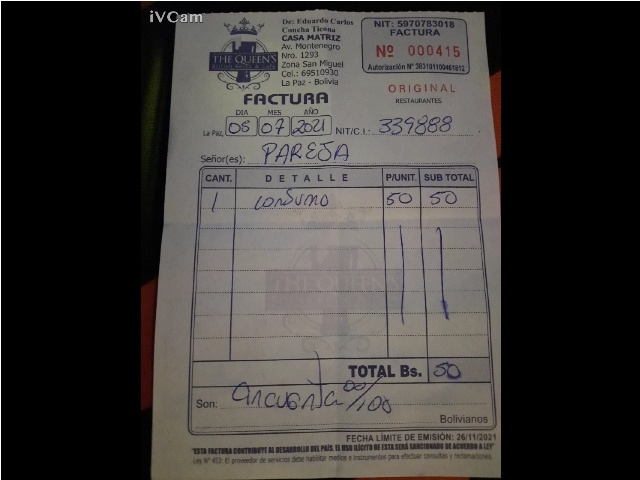

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:

  print(str(err))



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img = cv2.imread ('photo.jpg')
img.shape

H,W,C = img.shape
print (H,W,C)

480 640 3


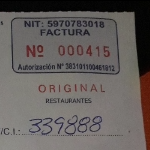

In [ ]:
#para imagen de camara 
#seleccionamos parte superior derecha 
cropped_img = img [:150,350:500,:]
cv2_imshow(cropped_img)


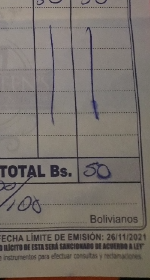

In [ ]:

cropped_img_bottom = img[200:480,350:500,:]
cv2_imshow (cropped_img_bottom)

# **Utilizamos la imagen escaneda**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img = cv2.imread ('escaneada.jpeg')
img.shape

H,W,C = img.shape
print (H,W,C)

915 1280 3


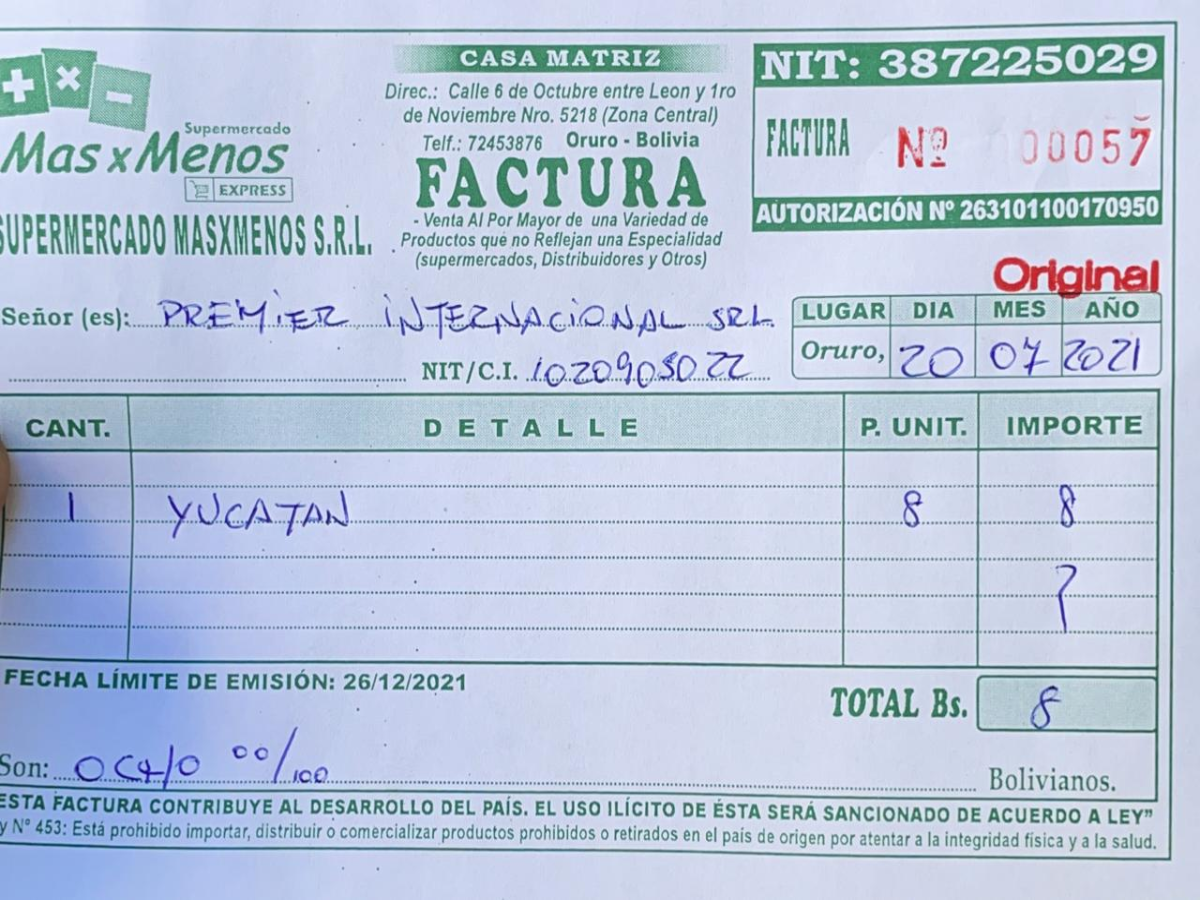

(900, 1200, 3)

In [ ]:
#para imagen horizontal 
#modificamos tamaño
img_horizontal = cv2.resize(img, (1200, 900)) 
cv2_imshow(img_horizontal)
img_horizontal.shape

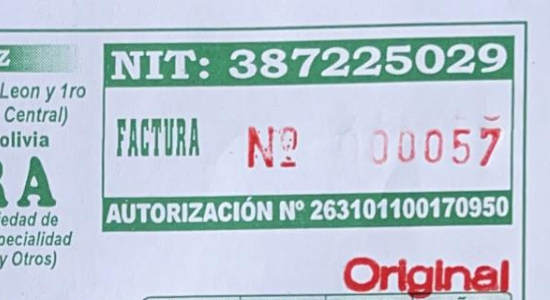

In [ ]:
#seleccionamos parte superior derecha
cropped_img = img_horizontal[:300,650:1200,:]
cv2_imshow(cropped_img)

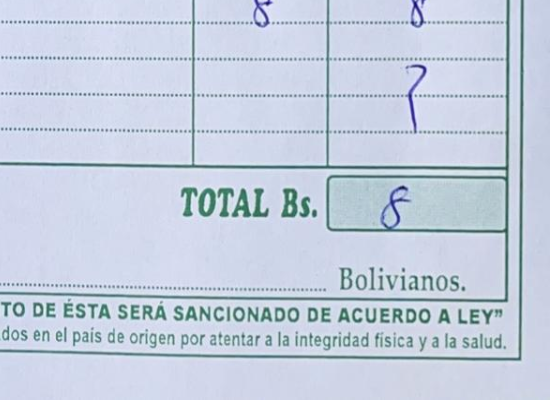

In [ ]:
#seleccionamos la parte inferior de abajo
cropped_img_bottom = img_horizontal [500:900,650:1200,:]
cv2_imshow (cropped_img_bottom)

# **Utilizamos pipeLine de Keras-ocr**

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [
    keras_ocr.tools.read(images) for images in [
        cropped_img,
        cropped_img_bottom
            ]
]   


In [ ]:
prediction = pipeline.recognize(images)

## **Tenemos la imagen preliminar con los datos predichos**

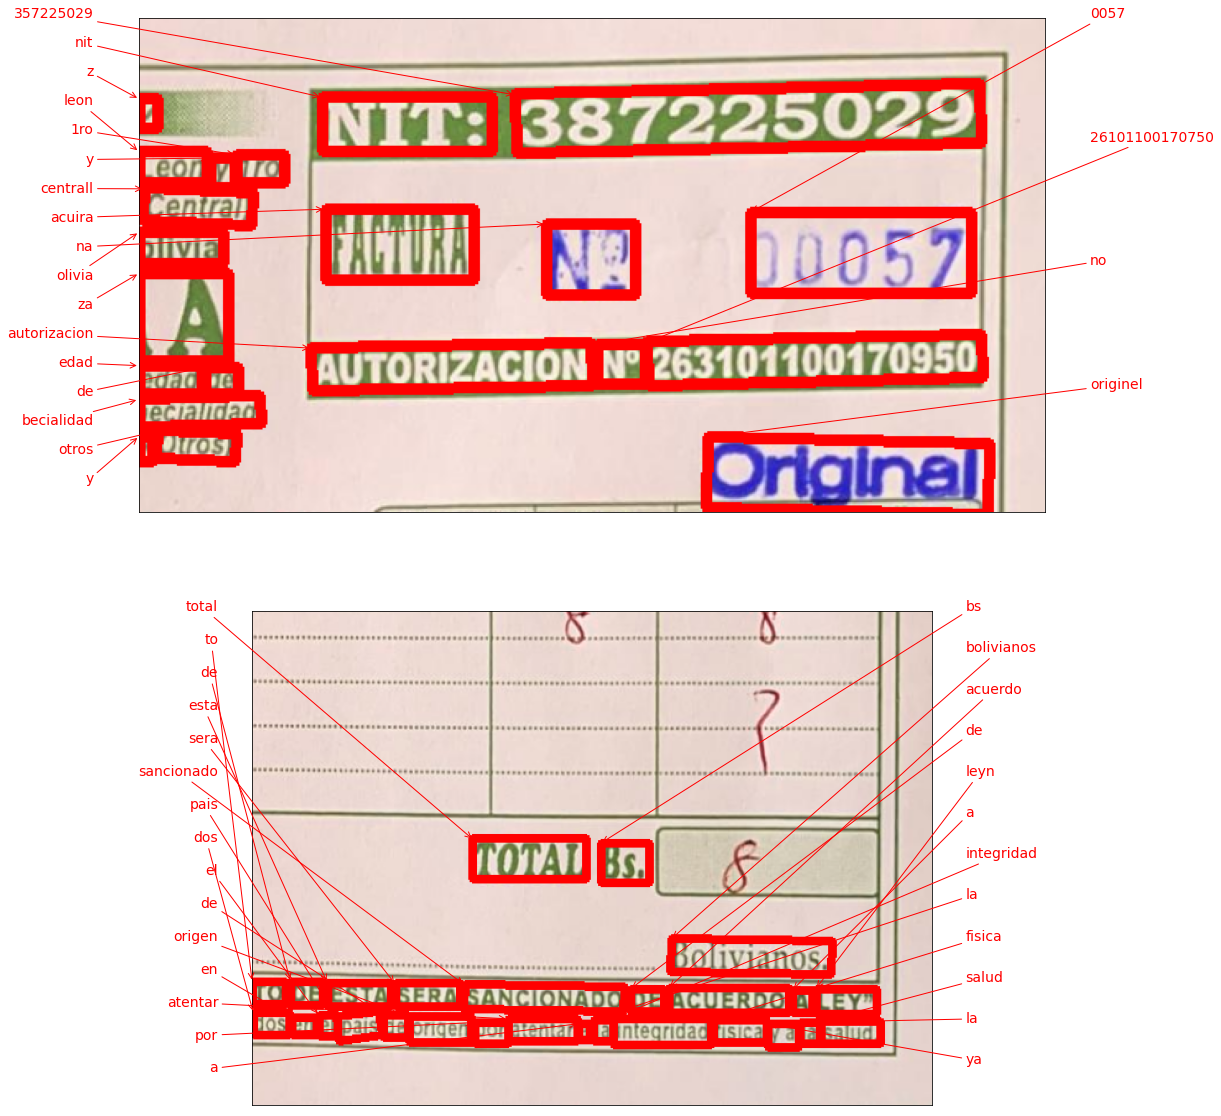

In [ ]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20,20))
for ax, image, predictions in zip(axs, images, prediction):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

## **Llevamos los datos a Pandas para su manipulacion**

In [ ]:
df = pd.DataFrame(prediction)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,"(357225029, [[228.38593, 46.595673], [510.7913...","(z, [[0.0, 49.0], [11.0, 49.0], [11.0, 67.0], ...","(nit, [[111.0, 48.0], [214.0, 48.0], [214.0, 8...","(leon, [[0.0, 81.0], [41.0, 81.0], [41.0, 100....","(1ro, [[59.0, 83.0], [88.0, 83.0], [88.0, 100....","(y, [[43.0, 85.0], [58.0, 85.0], [58.0, 103.0]...","(centrall, [[3.1584625, 103.642136], [69.57972...","(acuira, [[113.0, 116.0], [203.0, 116.0], [203...","(0057, [[371.0, 118.0], [505.0, 118.0], [505.0...","(na, [[247.0, 125.0], [301.0, 125.0], [301.0, ...","(olivia, [[0.0, 130.0], [51.0, 130.0], [51.0, ...","(za, [[0.0, 155.0], [54.0, 155.0], [54.0, 208....","(26101100170750, [[308.5498, 196.89069], [511....","(autorizacion, [[104.701035, 200.36101], [274....","(no, [[278.0, 198.0], [307.0, 198.0], [307.0, ...","(edad, [[0.0, 211.0], [38.0, 211.0], [38.0, 22...","(de, [[40.0, 212.0], [60.0, 212.0], [60.0, 228...","(becialidad, [[-0.40974426, 231.61026], [73.94...","(otros, [[11.119511, 250.69775], [59.304554, 2...","(y, [[0.0, 254.0], [8.0, 254.0], [8.0, 269.0],...","(originel, [[345.274, 254.39728], [516.67126, ...",None,None,None,None,None,None
1,"(total, [[178.99997, 184.99998], [270.99997, 1...","(bs, [[282.0, 188.0], [321.0, 188.0], [321.0, ...","(bolivianos, [[339.09344, 265.4585], [469.3526...","(to, [[0.0, 300.0], [27.0, 300.0], [27.0, 318....","(de, [[31.0, 300.0], [57.0, 300.0], [57.0, 319...","(esta, [[61.0, 301.0], [112.0, 301.0], [112.0,...","(sera, [[116.0, 301.99997], [168.0, 301.99997]...","(sancionado, [[172.069, 302.65192], [301.2587,...","(acuerdo, [[337.0, 305.0], [434.0, 305.0], [43...","(de, [[306.0, 306.0], [333.0, 306.0], [333.0, ...","(leyn, [[456.0, 306.0], [505.0, 306.0], [505.0...","(a, [[437.0, 307.0], [453.0, 307.0], [453.0, 3...","(dos, [[1.0, 325.0], [30.0, 325.0], [30.0, 343...","(el, [[54.0, 327.0], [69.0, 327.0], [69.0, 344...","(pais, [[68.24906, 328.57617], [102.70631, 324...","(de, [[106.0, 327.0], [126.0, 327.0], [126.0, ...","(en, [[32.0, 329.0], [52.0, 329.0], [52.0, 343...","(origen, [[127.0, 328.0], [177.0, 328.0], [177...","(atentar, [[207.0, 330.0], [263.0, 330.0], [26...","(la, [[276.0, 331.0], [292.0, 331.0], [292.0, ...","(integridad, [[292.0, 330.0], [371.0, 330.0], ...","(fisica, [[373.0, 331.0], [416.0, 331.0], [416...","(por, [[180.0, 333.0], [207.0, 333.0], [207.0,...","(la, [[443.0, 333.0], [459.0, 333.0], [459.0, ...","(salud, [[460.0, 332.0], [508.0, 332.0], [508....","(a, [[264.0, 334.0], [273.0, 334.0], [273.0, 3...","(ya, [[417.0, 334.0], [442.0, 334.0], [442.0, ..."


In [ ]:
[fil,col]=df.shape 

In [ ]:
prueba_df = df.fillna('Sin dato')
prueba_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,"(357225029, [[228.38593, 46.595673], [510.7913...","(z, [[0.0, 49.0], [11.0, 49.0], [11.0, 67.0], ...","(nit, [[111.0, 48.0], [214.0, 48.0], [214.0, 8...","(leon, [[0.0, 81.0], [41.0, 81.0], [41.0, 100....","(1ro, [[59.0, 83.0], [88.0, 83.0], [88.0, 100....","(y, [[43.0, 85.0], [58.0, 85.0], [58.0, 103.0]...","(centrall, [[3.1584625, 103.642136], [69.57972...","(acuira, [[113.0, 116.0], [203.0, 116.0], [203...","(0057, [[371.0, 118.0], [505.0, 118.0], [505.0...","(na, [[247.0, 125.0], [301.0, 125.0], [301.0, ...","(olivia, [[0.0, 130.0], [51.0, 130.0], [51.0, ...","(za, [[0.0, 155.0], [54.0, 155.0], [54.0, 208....","(26101100170750, [[308.5498, 196.89069], [511....","(autorizacion, [[104.701035, 200.36101], [274....","(no, [[278.0, 198.0], [307.0, 198.0], [307.0, ...","(edad, [[0.0, 211.0], [38.0, 211.0], [38.0, 22...","(de, [[40.0, 212.0], [60.0, 212.0], [60.0, 228...","(becialidad, [[-0.40974426, 231.61026], [73.94...","(otros, [[11.119511, 250.69775], [59.304554, 2...","(y, [[0.0, 254.0], [8.0, 254.0], [8.0, 269.0],...","(originel, [[345.274, 254.39728], [516.67126, ...",Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato
1,"(total, [[178.99997, 184.99998], [270.99997, 1...","(bs, [[282.0, 188.0], [321.0, 188.0], [321.0, ...","(bolivianos, [[339.09344, 265.4585], [469.3526...","(to, [[0.0, 300.0], [27.0, 300.0], [27.0, 318....","(de, [[31.0, 300.0], [57.0, 300.0], [57.0, 319...","(esta, [[61.0, 301.0], [112.0, 301.0], [112.0,...","(sera, [[116.0, 301.99997], [168.0, 301.99997]...","(sancionado, [[172.069, 302.65192], [301.2587,...","(acuerdo, [[337.0, 305.0], [434.0, 305.0], [43...","(de, [[306.0, 306.0], [333.0, 306.0], [333.0, ...","(leyn, [[456.0, 306.0], [505.0, 306.0], [505.0...","(a, [[437.0, 307.0], [453.0, 307.0], [453.0, 3...","(dos, [[1.0, 325.0], [30.0, 325.0], [30.0, 343...","(el, [[54.0, 327.0], [69.0, 327.0], [69.0, 344...","(pais, [[68.24906, 328.57617], [102.70631, 324...","(de, [[106.0, 327.0], [126.0, 327.0], [126.0, ...","(en, [[32.0, 329.0], [52.0, 329.0], [52.0, 343...","(origen, [[127.0, 328.0], [177.0, 328.0], [177...","(atentar, [[207.0, 330.0], [263.0, 330.0], [26...","(la, [[276.0, 331.0], [292.0, 331.0], [292.0, ...","(integridad, [[292.0, 330.0], [371.0, 330.0], ...","(fisica, [[373.0, 331.0], [416.0, 331.0], [416...","(por, [[180.0, 333.0], [207.0, 333.0], [207.0,...","(la, [[443.0, 333.0], [459.0, 333.0], [459.0, ...","(salud, [[460.0, 332.0], [508.0, 332.0], [508....","(a, [[264.0, 334.0], [273.0, 334.0], [273.0, 3...","(ya, [[417.0, 334.0], [442.0, 334.0], [442.0, ..."


In [ ]:
for i in range(col): 
    prueba_df.iloc [0,i] = prueba_df[i][0][0]  
    prueba_df.iloc [1,i] = prueba_df[i][1][0]  
    

 
prueba_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,357225029,z,nit,leon,1ro,y,centrall,acuira,0057,na,olivia,za,26101100170750,autorizacion,no,edad,de,becialidad,otros,y,originel,S,S,S,S,S,S
1,total,bs,bolivianos,to,de,esta,sera,sancionado,acuerdo,de,leyn,a,dos,el,pais,de,en,origen,atentar,la,integridad,fisica,por,la,salud,a,ya


In [ ]:
final_df=prueba_df.astype('string')


In [ ]:
final_df_1 = final_df.drop([1])
final_df_2 = final_df.drop([0])

In [ ]:
nit= '0000000'
for i in final_df_1:
 if (final_df_1[i][0]== 'nit'):
   
   nit=final_df_1[i+1][0]


In [ ]:
factura ='000000'
for i in final_df_1:
 if (final_df_1[i][0]== 'factura'):
   
   factura=final_df_1[i+1][0]


In [ ]:
autorizacion ='000000000'
for i in final_df_1:
 if (final_df_1[i][0]== 'autorizacion'):
   
   autorizacion=final_df_1[i+1][0]


In [ ]:
bs ='0.0'
for i in final_df_2:
 if (final_df_2[i][1]== 'bs'):
   
   bs=final_df_2[i+1][1]


In [ ]:
export_final = pd.DataFrame(np.zeros((1, 5)))
export_final.columns = ['Nº','NIT Proveedor','Nº Factura','N° Autorización','Importe Total']

export_final

,Nº,NIT Proveedor,Nº Factura,N° Autorización,Importe Total
0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_df = export_final

In [ ]:
x_df.loc[0,'NIT Proveedor'] = nit
x_df.loc[0,'Nº Factura'] = factura
x_df.loc[0,'N° Autorización'] = autorizacion
x_df.loc[0,'Importe Total'] =bs

x_df

,Nº,NIT Proveedor,Nº Factura,N° Autorización,Importe Total
0,0.0,leon,000000,no,bolivianos


## **Pasamos los datos a CSV**

In [ ]:
x_df.to_csv('facturas.csv', encoding='utf-8')
print('El DataFrame de las facturas fue guardado en un archivo CSV.')


El DataFrame de las facturas fue guardado en un archivo CSV.


In [ ]:
writer = pd.ExcelWriter('output.xlsx')

In [ ]:
x_df.to_excel(writer)

writer.save()
print('El DataFrame de las facturas fue guardado en un archivo Excel.')

El DataFrame de las facturas fue guardado en un archivo Excel.
